## Tensorflow and keras

In [15]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
# Keras function for loading images
from tensorflow.keras.preprocessing.image import load_img

In [16]:
import os

path = './data/clothing-dataset-small-master/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = os.path.abspath(f'{path}/{name}')

print(fullname)  # Verifica la ruta completa


c:\Users\usuario\Documents\extras\No abrir\Zoomcamp\proyectos\clothing_multiclass_classifier\notebooks\data\clothing-dataset-small-master\train\t-shirt\5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg


In [17]:
path = '../data/clothing-dataset-small-master/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

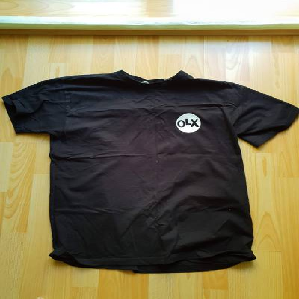

In [18]:
img

In [19]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x1737982EED0>


In [20]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [21]:
x.shape

(299, 299, 3)

## Pre-trained convultional nn

In [22]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [23]:
# `weights = "imagenet"` means we want to use pre-trained network that was trained on imagenet

model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

In [24]:
# esto es igual que expandir ddimensiones
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [25]:
# Esto es como el dividir por 255 para normalizar los datos
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [26]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(1, 1000)

In [27]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6819636)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139958)),
  ('n04370456', 'sweatshirt', np.float32(0.03432472)),
  ('n03710637', 'maillot', np.float32(0.011354212)),
  ('n04525038', 'velvet', np.float32(0.0018453563))]]

Al parecer, ImageNet no es bueno en clothes detection

## Transfer Learning

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '../data/clothing-dataset-small-master/train',
    target_size=(150,150),
    batch_size=32,
)

Found 3068 images belonging to 10 classes.


In [29]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [30]:
X, y = next(train_ds)

In [31]:
X.shape

(32, 150, 150, 3)

In [32]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [33]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# flow_from_directory me carga imagenes directamente desde una estructura de directorios, el shuffle se suele usar en validación o evaluación
val_ds = val_gen.flow_from_directory(
    '../data/clothing-dataset-small-master/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [35]:
# El include_top, en flase me excluye las capas densas finales
# esto es usado cuando quieres usar el modelo para tu propio problema específico con tus propias etiquetas
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# congela los pesos del modelo base, esto es para que cuando entrenemos no se vuelva a entrenar los pesos del modelo base.
base_model.trainable = False

In [36]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 10)

In [37]:
preds[0]

array([-0.17136654,  0.34825036,  0.5192267 ,  0.19146869, -1.6086223 ,
       -0.8153825 ,  0.70515203, -0.67669594, -0.77168584, -0.11678249],
      dtype=float32)

In [38]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [39]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

c:\Users\usuario\Documents\extras\No abrir\Zoomcamp\proyectos\clothing_multiclass_classifier\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 91s 904ms/step - accuracy: 0.5790 - loss: 1.5843 - val_accuracy: 0.7243 - val_loss: 1.2195
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 873ms/step - accuracy: 0.8223 - loss: 0.5754 - val_accuracy: 0.7859 - val_loss: 0.8291
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 873ms/step - accuracy: 0.8978 - loss: 0.3013 - val_accuracy: 0.7654 - val_loss: 0.9105
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 868ms/step - accuracy: 0.9288 - loss: 0.2091 - val_accuracy: 0.7742 - val_loss: 0.8907
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 89s 929ms/step - accuracy: 0.9452 - loss: 0.1654 - val_accuracy: 0.7977 - val_loss: 0.8476
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 938ms/step - accuracy: 0.9637 - loss: 0.1142 - val_accuracy: 0.7918 - val_loss: 0.8292
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 86s 895ms/step - accuracy: 0.9693 - loss: 0.0834 - val_accuracy: 0.8123 - val_loss: 0.8119
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 873ms/step - accuracy: 0.9888 - loss: 0.0437 - val_accu

In [40]:
history.history['accuracy']
# history.history['val_accuracy']

[0.671447217464447,
 0.8171446919441223,
 0.8956975340843201,
 0.9250326156616211,
 0.9436115026473999,
 0.9638200998306274,
 0.9709908962249756,
 0.9804432988166809,
 0.9850065112113953,
 0.9934810996055603]

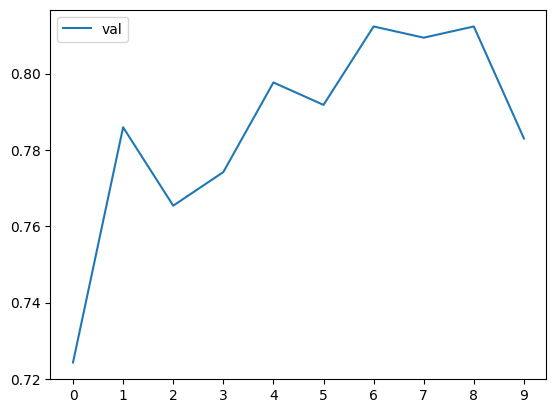

In [41]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()